https://rstudio-pubs-static.s3.amazonaws.com/547806_e51b8f800a244adaa8cb700b6eea95cb.html

http://rstudio-pubs-static.s3.amazonaws.com/203045_9744ef21cf43440e8aecc4abc284c6ad.html

# U.S. News & World Report’s College Data

## 一. <a href='#資料介紹'>資料介紹</a>

1. 來源
2. 資料介紹
3. 欄位


## 二. <a href='#呈現'>呈現</a>
1. <a href='#1.-Load-Libraries'>Load Libraries</a>
2. <a href='#2.-Load-Data'>Load Data</a>
3. <a href='#3.-Data-Preprocessing'>Data Preprocessing</a>          
4. <a href='#4.-Analyze-Data-1'>Analyze Data-1</a>        
4. <a href='#5.-Analyze-Data-2'>Analyze Data-2</a>        
5. <a href='#6.-PCA'>PCA</a>


## 資料介紹


### 1.來源
[An Introduction to Statistical Learning with Applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) 這本書裡使用到的資料集 - [College.csv](http://faculty.marshall.usc.edu/gareth-james/ISL/College.csv)

[Kaggle](https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data) 上也可以下載得到

### 2.資料介紹
根據1995年《[U.S. News & World Report’s](https://www.usnews.com)》發布的美國大學的統計數據。

### 3.欄位

Shape：(777, 18)


英文欄位|中文欄位|描述
:---:|:---:|:---
Private|私立學校|No：公立學校 / Yes：私立學校
Apps|申請數量|Number of applications received
Accept|接受的申請數量|Number of applications accepted
Enroll|註冊數量|Number of new students enrolled
Top10perc|新生在高中的班排為前10%的比例|Pct. new students from top 10% of H.S. class
Top25perc|新生在高中的班排為前25%的比例|Pct. new students from top 25% of H.S. class
F.Undergrad|全職學生|Number of fulltime undergraduates
P.Undergrad|非全職學生|Number of parttime undergraduates
Outstate|州外學費|Out-of-state tuition
Room.Board|食宿費用|Room and board costs
Books|書籍費用|Estimated book costs
Personal|個人花費|Estimated personal spending
PhD|教職員為博士的比例|Pct. of faculty with Ph.D.’s
Terminal|教職員為領域中最高學位的比例（一般來說為博士）|Pct. of faculty with terminal degree
S.F.Ratio|師生比|Student/faculty ratio
perc.alumni|校友捐獻的比例|Pct. alumni who donate
Expend|每個學生的教學支出|Instructional expenditure per student
Grad.Rate|畢業率|Graduation rate

<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>

---

## 呈現

## 1. Load Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
pd.set_option('display.float_format',lambda x : '%.2f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 30)


sns.set()

<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>

---

## 2. Load Data

In [60]:
df = pd.read_csv("../input/College.csv", index_col=0)

### 資料筆數：(777, 18)

In [61]:
df.shape

(777, 18)

In [62]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [63]:
# df = df.rename(columns={"Unnamed: 0": "University"})

<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>

---

## 3. Data Preprocessing
1. Private Yes/No to 1/0
2. Missing Value
3. Percentage > 100
4. Columns Preprocess

### 3.1 Private Yes/No to 1/0
- 私立大學：Yes -> 1
- 公立大學：No -> 0

In [64]:
df['Private'] = df['Private'].apply(lambda x:1 if x =='Yes' else 0)

In [65]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54


### 3.2 Missing Value

In [66]:
def na_check(df):
    missing = pd.DataFrame(df.isnull().sum(), columns=['missing'])
    missing = missing.sort_values(ascending=False, by=['missing'])
    missing = missing[missing['missing']>0]
    if len(missing)==0:
        print('No Missing Value !')
    else:
        display(missing)
na_check(df)

No Missing Value !


### 3.3 Percentage > 100
> 有些欄位的比例大於100，不合理，所以把那些 >100%的改成 100%

1. PhD：103%
2. Grad.Rate：108%

In [67]:
df.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,0.73,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,0.45,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,0.00,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,0.00,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1.00,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,1.00,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,1.00,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


In [68]:
df[df['PhD']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Texas A&M University at Galveston,0,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.40,16,6415,43


In [69]:
df['PhD'] = df['PhD'].apply(lambda x:100 if x >100 else x) 

In [70]:
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,1,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.30,20,7697,118


In [71]:
df['Grad.Rate'] = df['Grad.Rate'].apply(lambda x:100 if x >100 else x) 

### 3.4 Columns Preprocess

#### Add
1. Accept_Rate：錄取率 Accept / Apps
2. Enroll_Rate：註冊率  Enroll / Accept
3. Full_Percentage：全職學生比例 = F.Undergrad / F.Undergrad + P.Undergrad
4. Full_Percentage：全職學生比例 = P.Undergrad / F.Undergrad + P.Undergrad

#### Turn To Percentage
1. Top10perc / 100
2. Top25perc / 100
3. PhD / 100
4. Terminal / 100
4. perc.alumni / 100
5. Grad.Rate / 100


In [72]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [73]:
df['Accept_Rate'] = df['Accept'] / df['Apps']
df['Enroll_Rate'] = df['Enroll'] / df['Accept']
df['Top10perc'] = df['Top10perc'] / 100
df['Top25perc'] = df['Top25perc'] / 100
df['PhD'] = df['PhD'] / 100
df['Terminal'] = df['Terminal'] / 100
df['perc.alumni'] = df['perc.alumni'] / 100
df['Grad.Rate'] = df['Grad.Rate'] / 100
df['Full_Percentage'] = df['F.Undergrad'] / (df['F.Undergrad'] + df['P.Undergrad'])
df['Partime_Percentage'] = df['P.Undergrad'] / (df['F.Undergrad'] + df['P.Undergrad'])

In [74]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept_Rate,Enroll_Rate,Full_Percentage,Partime_Percentage
Abilene Christian University,1,1660,1232,721,0.23,0.52,2885,537,7440,3300,450,2200,0.70,0.78,18.10,0.12,7041,0.60,0.74,0.59,0.84,0.16
Adelphi University,1,2186,1924,512,0.16,0.29,2683,1227,12280,6450,750,1500,0.29,0.30,12.20,0.16,10527,0.56,0.88,0.27,0.69,0.31
Adrian College,1,1428,1097,336,0.22,0.50,1036,99,11250,3750,400,1165,0.53,0.66,12.90,0.30,8735,0.54,0.77,0.31,0.91,0.09
Agnes Scott College,1,417,349,137,0.60,0.89,510,63,12960,5450,450,875,0.92,0.97,7.70,0.37,19016,0.59,0.84,0.39,0.89,0.11
Alaska Pacific University,1,193,146,55,0.16,0.44,249,869,7560,4120,800,1500,0.76,0.72,11.90,0.02,10922,0.15,0.76,0.38,0.22,0.78


<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>

## 4. Analyze Data-1

### 4.0 統整差異
- [美國最佳十大公立大學和私立大學對比分析！(2017)](https://kknews.cc/zh-tw/education/mmkav8z.html)

---
1.  資金來源
    - 公立院校：主要為聯邦政府、州政府的稅收撥款或地方政府部門的撥款。
    - 私立院校：主要經費來源為教會、校友會、企業界、基金會等方面的贈款及從這些款項累積而成的捐贈基金所得的收益等。


2. 留學費用
    - 公立大學：學費在1.5-2.5萬美金/年，算上生活費，公立大學一年整個花費會在2.5-3.5萬美金左右
    - 私立學校：可達到5萬元左右。


3. 錄取方面
    - 公立和私立的另一個區別在於錄取學生的標準不同。公立大學除了某些知名大學外都帶有普及性質，而私立大學的錄取標準要求較高。
    
    
4. 規模方面
    - 公立和私立大學的學校規模不同。
    - 公立大學的規模一般要大於私立大學的規模
    - 教師與學生的比例往往是公立大學少於私立大學。


5. 學校排名
    - 根據USNEWS，排名前五十的大學私立大學居多。
    
    
6. 教育質量
    - 私立大學的教育品質會比公立要好。
    - 主要是因為公立大學的經費來源是由政府出資，而私立大學則是面向私人或者財團。
    - 美國人又比較重視私人或者財團對教育的投資和回報。
    
    
7. 2017 US NEWS 參考排名

排名|美國最佳私立大學|美國最佳公立大學
:---:|:---:|:---:
1|哈佛大學|加州大學伯克利分校
2|史丹福大學|加州大學洛杉磯分校
3|麻省理工學院|密西根大學安娜堡分校
4|哥倫比亞大學|加州大學聖地亞哥分校
5|芝加哥大學|威斯康星大學麥迪遜分校
6|普林斯頓大學|加州大學
7|康奈爾大學|德克薩斯大學奧斯汀分校
8|耶魯大學|華盛頓大學
9|加州理工學院|伊利諾伊大學厄巴納
10|賓夕法尼亞大學|北卡羅萊納大學教堂山分校

### 4.1 最多申請數量的前10名
1. 可以看出最多申請數量的前10名大學中只有1間是私立學校
2. 申請數量最多的反而不是排名最前面的學校
3. 東部 > 中西部 >>>> 西部




- [註] 以下的排名都是以2020 US NEWS的Ranking去填入的

In [75]:
Top10_Apps_df = df.sort_values(by='Apps', ascending = False).reset_index()[['index', 'Apps', 'Private']]
Top10_Apps_df = Top10_Apps_df.rename(columns={"index": "University"})[:10]
Ranking = ['62', '57', '40', '22', '50', '25', '84', '79', '28', '74']
State = ['New Jersey', 'Indiana', 'Massachusetts', 'California', 'Pennsylvania', 'Michigan', 'Michigan', 'Indiana', 'Virginia', 'Virginia']
Direction = ['East', 'Midwest', 'East', 'West', 'East', 'Midwest', 'Midwest', 'Midwest', 'East', 'East']
Top10_Apps_df['Ranking'] = Ranking
Top10_Apps_df['State'] = State 
Top10_Apps_df['Direction'] = Direction 
Top10_Apps_df

,University,Apps,Private,Ranking,State,Direction
0,Rutgers at New Brunswick,48094,0,62,New Jersey,East
1,Purdue University at West Lafayette,21804,0,57,Indiana,Midwest
2,Boston University,20192,1,40,Massachusetts,East
3,University of California at Berkeley,19873,0,22,California,West
4,Pennsylvania State Univ. Main Campus,19315,0,50,Pennsylvania,East
5,University of Michigan at Ann Arbor,19152,0,25,Michigan,Midwest
6,Michigan State University,18114,0,84,Michigan,Midwest
7,Indiana University at Bloomington,16587,0,79,Indiana,Midwest
8,University of Virginia,15849,0,28,Virginia,East
9,Virginia Tech,15712,0,74,Virginia,East


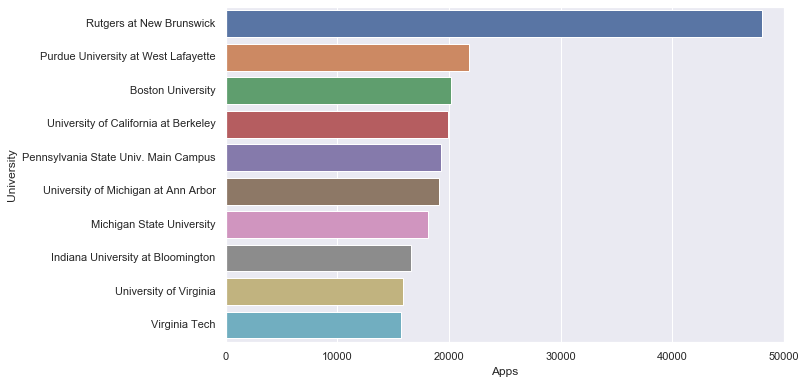

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(x=Top10_Apps_df.Apps, y=Top10_Apps_df.University)
plt.show()

In [77]:
Top10_Apps_groupby = Top10_Apps_df.groupby(['Direction']).count()['University'].reset_index()

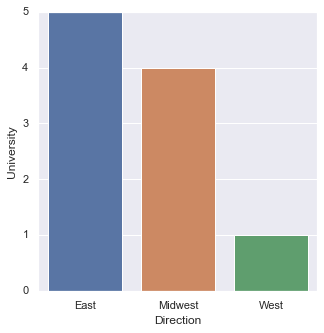

In [78]:
plt.figure(figsize=(5,5))
sns.barplot(x=Top10_Apps_groupby.Direction, y=Top10_Apps_groupby.University)
plt.show()

### 4.2 新生在高中的班排為前10%的比例的前10名

1. 可以看出新生在高中的班排為前10%比例最高的前10名大學中只有2間是公立學校
2. 均為排名30以前
3. 東部 >>>> 西部

In [79]:
Top10perc_df = df.sort_values(by='Top10perc', ascending = False).reset_index()[['index', 'Top10perc', 'Private']]
Top10perc_df = Top10perc_df.rename(columns={"index": "University"})[:10]
Ranking = ['3', '22', 'College 23', '3', '10', '1', '2', '29', '12', '14']
State = ['Massachusetts', 'California', 'California', 'Connecticut', 'North Carolina', 'New Jersey', 'Massachusetts', 'Georgia', 'New Hampshire', 'Rhode Island']
Direction = ['East', 'West', 'West', 'East', 'East', 'East', 'East', 'East', 'East', 'East']
Top10perc_df['Ranking'] = Ranking
Top10perc_df['State'] = State 
Top10perc_df['Direction'] = Direction 
Top10perc_df

,University,Top10perc,Private,Ranking,State,Direction
0,Massachusetts Institute of Technology,0.96,1,3,Massachusetts,East
1,University of California at Berkeley,0.95,0,22,California,West
2,Harvey Mudd College,0.95,1,College 23,California,West
3,Yale University,0.95,1,3,Connecticut,East
4,Duke University,0.90,1,10,North Carolina,East
5,Princeton University,0.90,1,1,New Jersey,East
6,Harvard University,0.90,1,2,Massachusetts,East
7,Georgia Institute of Technology,0.89,0,29,Georgia,East
8,Dartmouth College,0.87,1,12,New Hampshire,East
9,Brown University,0.87,1,14,Rhode Island,East


In [80]:
# plt.figure(figsize=(10,6))
# sns.barplot(x=Top10perc_df.Top10perc, y=Top10perc_df.University)
# plt.show()

In [81]:
Top10perc_groupby = Top10perc_df.groupby(['Direction']).count()['University'].reset_index()

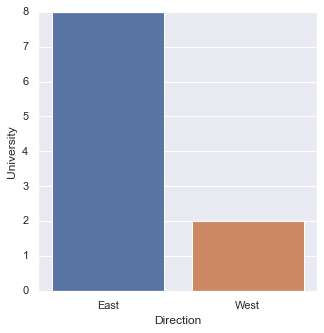

In [82]:
plt.figure(figsize=(5,5))
sns.barplot(x=Top10perc_groupby.Direction, y=Top10perc_groupby.University)
plt.show()

### 4.3 校友捐獻比例最多的前10名

1. 可以看出校友捐獻比例最多都是私立學校
    - 因為公、私立學校的主要差異是經費來源
    - 公立學校的經費主要來自於聯邦政府、州政府和地方政府的資助
    - 私立學校的主要經費來源則是教會、校友會、企業、基金會等單位的捐款，以及學生繳交的學費
2. 均為排名30以前
3. 東部 >>>> 西部

In [83]:
Top10_alumni_df = df.sort_values(by='perc.alumni', ascending = False).reset_index()[['index', 'perc.alumni', 'Private']]
Top10_alumni_df = Top10_alumni_df.rename(columns={"index": "University"})[:10]
Ranking = ['3', '22', 'College 23', '3', '10', '1', '2', '29', '12', '14']
State = ['Massachusetts', 'California', 'California', 'Connecticut', 'North Carolina', 'New Jersey', 'Massachusetts', 'Georgia', 'New Hampshire', 'Rhode Island']
Direction = ['East', 'West', 'West', 'East', 'East', 'East', 'East', 'East', 'East', 'East']
Top10_alumni_df['Ranking'] = Ranking
Top10_alumni_df['State'] = State 
Top10_alumni_df['Direction'] = Direction 
Top10_alumni_df

,University,perc.alumni,Private,Ranking,State,Direction
0,Williams College,0.64,1,3,Massachusetts,East
1,Amherst College,0.63,1,22,California,West
2,Carleton College,0.60,1,College 23,California,West
3,Hamilton College,0.60,1,3,Connecticut,East
4,Centre College,0.60,1,10,North Carolina,East
5,Gustavus Adolphus College,0.58,1,1,New Jersey,East
6,Lawrence University,0.57,1,2,Massachusetts,East
7,Wabash College,0.55,1,29,Georgia,East
8,College of the Holy Cross,0.55,1,12,New Hampshire,East
9,Princeton University,0.54,1,14,Rhode Island,East


In [84]:
# plt.figure(figsize=(10,6))
# sns.barplot(x=Top10_alumni_df['perc.alumni'], y=Top10_alumni_df.University)
# plt.show()

In [85]:
Top10perc_groupby = Top10perc_df.groupby(['Direction']).count()['University'].reset_index()

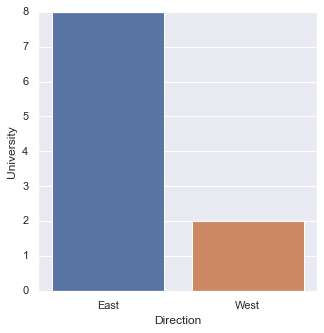

In [86]:
plt.figure(figsize=(5,5))
sns.barplot(x=Top10perc_groupby.Direction, y=Top10perc_groupby.University)
plt.show()

### 4.3-1 註
有想過要看畢業率低的學校，但因為變數很多，畢業率低有可能是因為學生不認真，也有可能因為某些學校比較不好畢業（課業太重以致無法準時畢業），也有可能因為學生的個人因素，所以比較就沒有參考

### 4.4 錄取率最低的前10名

1. 可以看出錄取率最低都是私立學校
    [University跟College差別](https://www.thenewslens.com/article/18038)
    - College：
        - Liberal arts colleges （可以譯作「文理學院」，另一種翻譯是「博雅教育學院」）幾乎全是私立的，規模較小，只有一二千學生，大多只提供本科教育（學士），少數有碩士課程，但一定沒有研究院。還有Liberal arts college著重通才教育，包括體育、德育、思辨能力、領導才能等，不只是傳授知識，更不會提供偏重職業技能的課程（例如會計） 。
    - University：
        - 分研究型和教學型，前者規模很大，有不同的研究院；頂尖的研究型大學裡，研究生的人數可以比本科生多（例如Columbia University）。
        - 教學型大學大多是公立的，沒有研究院，但很多都有碩士課程；教學型大學的規模比研究型的小，但比起liberal arts college則仍然大很多，學生至少過萬，提供的課程也較多樣化，而且肯定會包括偏重職業技能的課程。
    - 這樣的解釋好像很清楚了，可是不要以為名字是 ‘University’ 的一定是 University，名字是 ‘College’ 一定是 Liberal arts college。
        - 長春藤聯盟裡的Dartmouth College是university，Big Three 是Harvard , Yale, 和Princeton) ，名為University，卻是一間Liberal arts college。
        - 還有一點容易令人混淆的，是University可以由不同的Colleges組成
        
        
    
2. 均為排名30以前

3. 東部 >>>> 西部

In [87]:
Accept_Rate_df = df.sort_values(by='Accept_Rate').reset_index()[['index', 'Accept_Rate', 'Private']]
Accept_Rate_df = Accept_Rate_df.rename(columns={"index": "University"})[:10]
Ranking = ['1', '2', '3', 'College #2', '14', '24', '12', '10', '3', 'College #1']
State = ['New Jersey', 'California', 'Connecticut', 'Massachusetts', 'Rhode Island', 'Washington', 'Massachusetts', 'Georgia', 'New York', 'Massachusetts']
Direction = ['East', 'West', 'East', 'East', 'East', 'West', 'East', 'East', 'East', 'East']
Accept_Rate_df['Ranking'] = Ranking
Accept_Rate_df['State'] = State 
Accept_Rate_df['Direction'] = Direction 
Accept_Rate_df

,University,Accept_Rate,Private,Ranking,State,Direction
0,Princeton University,0.15,1,1,New Jersey,East
1,Harvard University,0.16,1,2,California,West
2,Yale University,0.23,1,3,Connecticut,East
3,Amherst College,0.23,1,College #2,Massachusetts,East
4,Brown University,0.26,1,14,Rhode Island,East
5,Georgetown University,0.26,1,24,Washington,West
6,Dartmouth College,0.26,1,12,Massachusetts,East
7,Duke University,0.28,1,10,Georgia,East
8,Columbia University,0.29,1,3,New York,East
9,Williams College,0.30,1,College #1,Massachusetts,East


In [88]:
# plt.figure(figsize=(10,6))
# sns.barplot(x=Accept_Rate_df.Accept_Rate, y=Accept_Rate_df.University)
# plt.show()

In [89]:
Accept_Rate_groupby = Accept_Rate_df.groupby(['Direction']).count()['University'].reset_index()

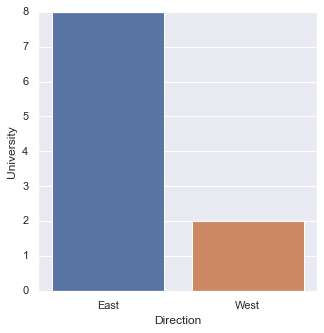

In [90]:
plt.figure(figsize=(5,5))
sns.barplot(x=Accept_Rate_groupby.Direction, y=Accept_Rate_groupby.University)
plt.show()

### 4.5 師生比最低的前10名

1. 可以看出師生比最低都是私立學校       
    
2. 排名有前面也有後面的

3. 東部 > 中西部

In [91]:
SFRatio_df = df.sort_values(by='S.F.Ratio').reset_index()[['index', 'S.F.Ratio', 'Private']][0:10]
SFRatio_df = SFRatio_df.rename(columns={"index": "University"})[:10]
Ranking = ['293-381', '40', '10', '19', '27', '97', '12', '10', '21', '6']
State = ['South Carolina', ' Ohio', 'Washington', 'North Carolina', 'Missouri', 'Washington', 'Massachusetts', 'Georgia', 'Georgia', 'Illinois']
Direction = ['East', 'Midwest', 'West', 'East', 'Midwest', 'West', 'East', 'East', 'East', 'Midwest']
SFRatio_df['Ranking'] = Ranking
SFRatio_df['State'] = State 
SFRatio_df['Direction'] = Direction 
SFRatio_df

,University,S.F.Ratio,Private,Ranking,State,Direction
0,University of Charleston,2.50,1,293-381,South Carolina,East
1,Case Western Reserve University,2.90,1,40,Ohio,Midwest
2,Johns Hopkins University,3.30,1,10,Washington,West
3,Washington University,3.90,1,19,North Carolina,East
4,Wake Forest University,4.30,1,27,Missouri,Midwest
5,Saint Louis University,4.60,1,97,Washington,West
6,Dartmouth College,4.70,1,12,Massachusetts,East
7,Duke University,5.00,1,10,Georgia,East
8,Emory University,5.00,1,21,Georgia,East
9,University of Chicago,5.30,1,6,Illinois,Midwest


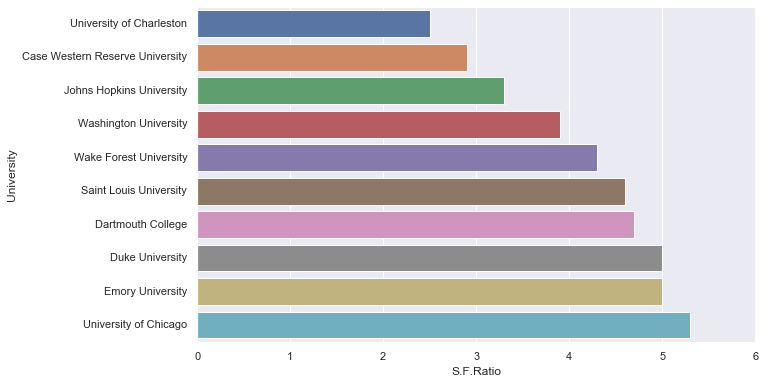

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(x=SFRatio_df['S.F.Ratio'], y=SFRatio_df.University)
plt.show()

In [93]:
SFRatio_df_groupby = SFRatio_df.groupby(['Direction']).count()['University'].reset_index()

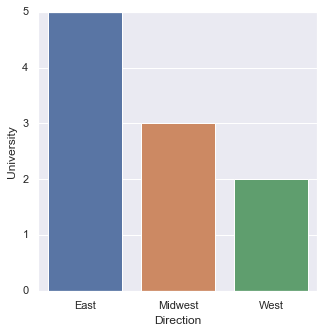

In [94]:
plt.figure(figsize=(5,5))
sns.barplot(x=SFRatio_df_groupby.Direction, y=SFRatio_df_groupby.University)
plt.show()

### 4.6 申請數量最低的前10名（有可能過幾年就會消失...）

1. 可以看出錄取率最低都是私立學校
   
2. 均為排名30以前

3. 東部 >>>> 西部

In [95]:
Apps_df = df.sort_values(by='Apps').reset_index()[['index', 'Apps', 'Private']][0:10]
Apps_df = Apps_df.rename(columns={"index": "University"})[:10]
State = ['Virginia', 'Washington', 'Vermont', 'Indiana', ' Wisconsin', 'Pennsylvania', ' Washington', 'Missouri', 'Alaska', 'Kansas']
Direction = ['East', 'East', 'Midwest', 'Midwest', 'East', 'East', 'West', 'Midwest', '-', 'Midwest']
Apps_df['State'] = State 
Apps_df['Direction'] = Direction 
Apps_df

,University,Apps,Private,State,Direction
0,Christendom College,81,1,Virginia,East
1,Capitol College,100,1,Washington,East
2,College of St. Joseph,141,1,Vermont,Midwest
3,Saint Mary-of-the-Woods College,150,1,Indiana,Midwest
4,Wisconsin Lutheran College,152,1,Wisconsin,East
5,Wilson College,167,1,Pennsylvania,East
6,Central Wesleyan College,174,1,Washington,West
7,St. Martin's College,191,1,Missouri,Midwest
8,Alaska Pacific University,193,1,Alaska,-
9,Bethel College KS,202,1,Kansas,Midwest


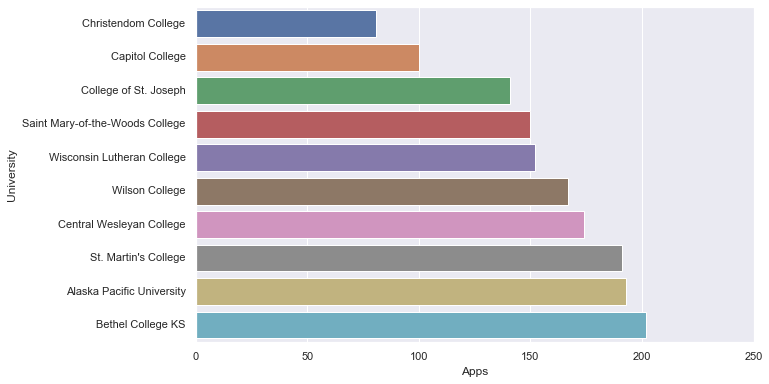

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(x=Apps_df['Apps'], y=Apps_df.University)
plt.show()

In [97]:
Apps_df_groupby = Apps_df.groupby(['Direction']).count()['University'].reset_index()

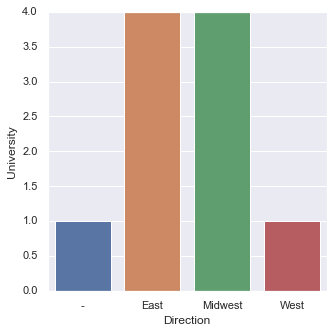

In [98]:
plt.figure(figsize=(5,5))
sns.barplot(x=Apps_df_groupby.Direction, y=Apps_df_groupby.University)
plt.show()

<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>

---

## 5. Analyze Data-2

### 5.1 Distplot
1. Grad.Rate：可以看出私立的畢業率比公立的整體來說要來得高
2. F.Undergrad：可以看出私立的全職學生數量比較集中，大部分都在5000以下，公立的就較為分散
    - 我自己的想法是會當非全職的學生很有可能的原因是因為經濟壓力，因為美國大學學費一年都要將近100萬台幣，應該有一部分的學生是負擔不起這個價錢的，所以可能會選擇非全職學生，這樣可以繳的學費可能會少一點
3. Outstate：州外學費可以看出私立的明顯比公立的多很多
    - 因為就像前面提到的公立學校主要是靠聯邦政府、州政府的稅收或其他款項來支撐，私立的一切都要靠校友捐款，資源就會比較不夠，所以州外學費比較貴也是說得通的
4. Expend：花費的話私立學校還是比公立學校來得多一些
5. perc.alumni：私立學校的校友捐款比公立多出很多
6. Terminal：學校的教授拿到該領域最高的學位的比例 公立學校比私立學校多一些

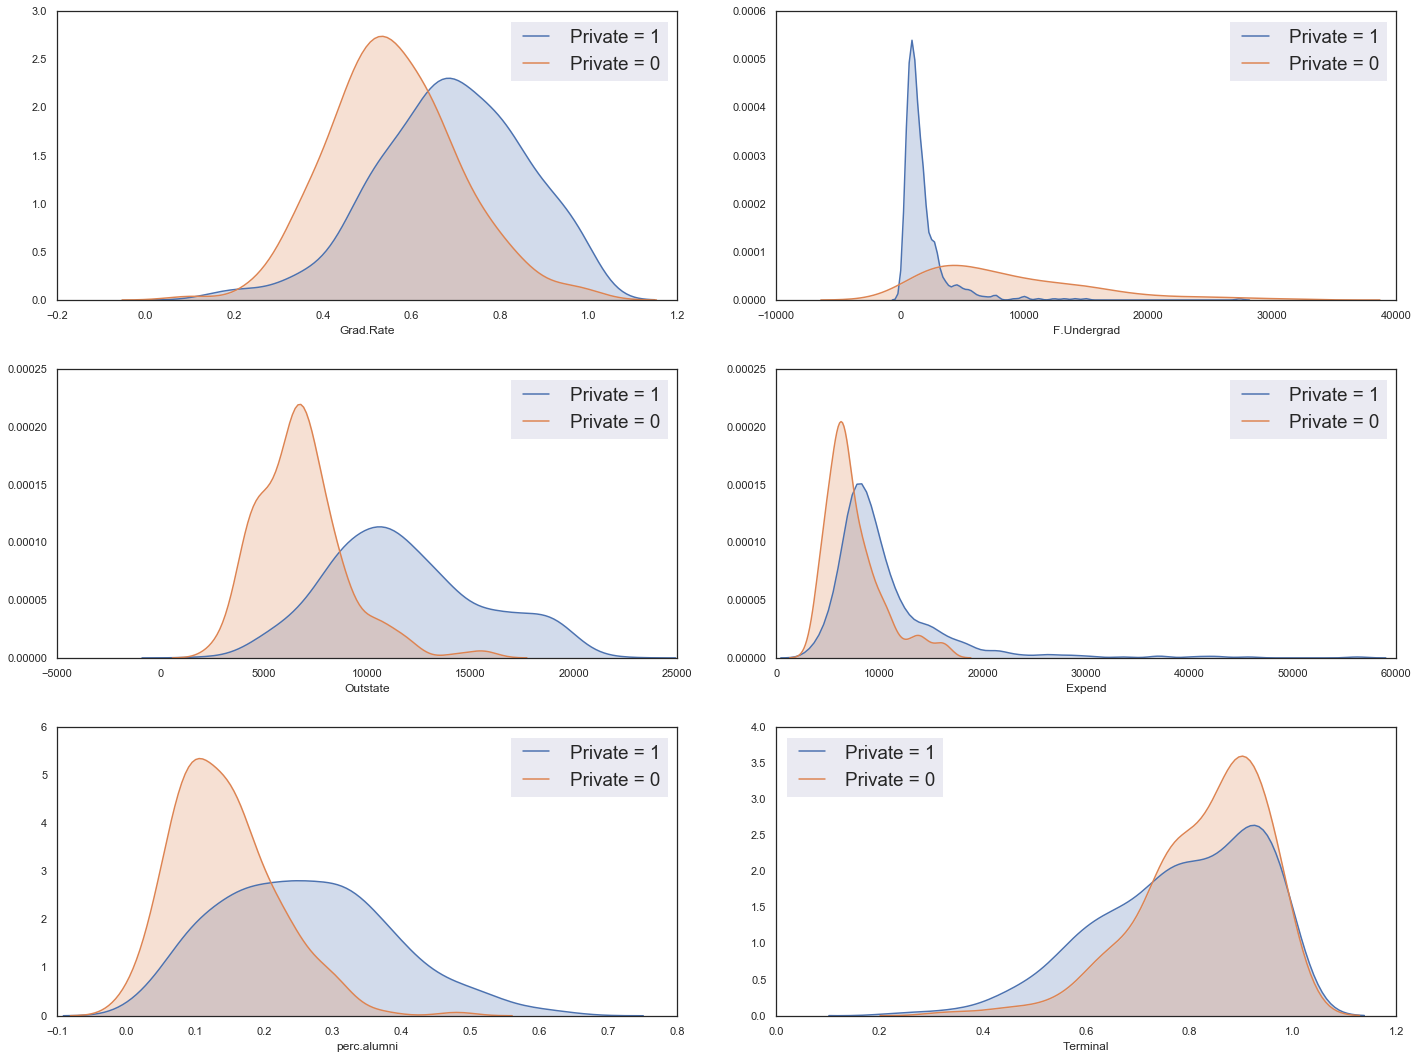

In [99]:
sns.set_style("white")

fig, ((a,b),(c,d), (e,f)) = plt.subplots(3,2,figsize=(24,18))
plt.subplots_adjust(wspace =0.16, hspace =0.24)
num_features =  ['Grad.Rate','F.Undergrad', 'Outstate', 'Expend', 'perc.alumni', 'Terminal']

ax_ = [a, b, c, d, e, f]

for col, ax in zip(num_features, ax_):
    sns.set(font_scale =1.7)
    sns.distplot(df.loc[df['Private'] == 1][col], kde_kws={"label": "Private = 1", "shade": True}, hist=False ,ax=ax)
    sns.distplot(df.loc[df['Private'] == 0][col], kde_kws={"label": "Private = 0", "shade": True}, hist=False ,ax=ax)

### 5.2 新生在高中的班排為前10%的比例 跟 錄取率

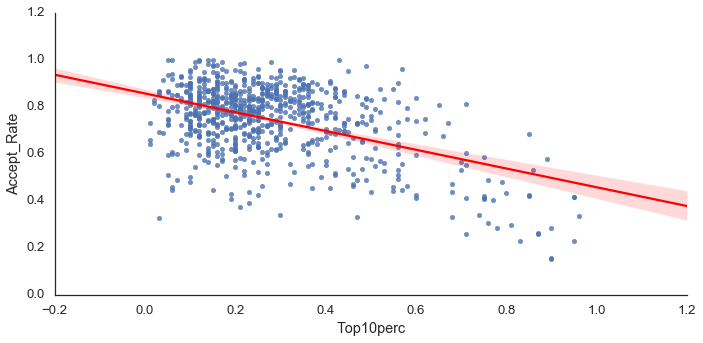

In [100]:
sns.set(font_scale =1.2)
sns.set_style("white")
sns.lmplot(x="Top10perc", y="Accept_Rate", data=df, height=5, aspect= 2, line_kws={'color': 'red'})

<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>

---

## 6. PCA

In [101]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [102]:
#輸入有多少成份我們想要留住分解
pca = PCA(n_components=2)

#將資料轉成兩個主成份
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#原本有30種維度
scaled_data.shape

#轉型後變成只有兩種維度
x_pca.shape

(777, 2)

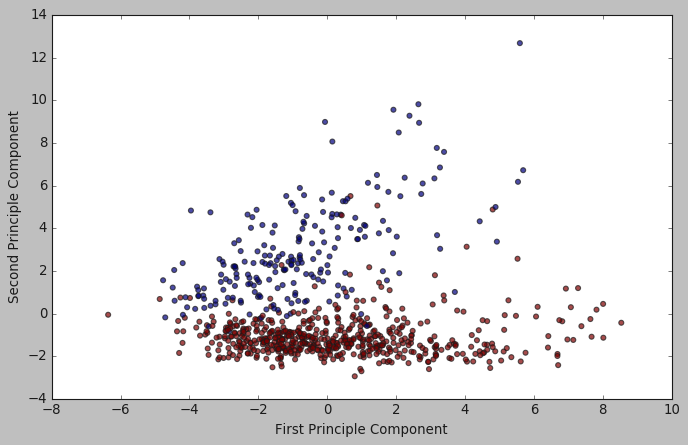

In [109]:
plt.style.use('classic')
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Private'],alpha=0.7)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()

In [105]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28263166 0.23192188]


In [106]:
pca.singular_values_

array([69.50759371, 62.96405793])

<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>